**Построение модели нейронной сети которая будет рекомендовать соотношение матрица-наполнитель**

Нейро́нная сеть (также иску́сственная нейро́нная сеть, ИНС, или просто нейросе́ть) — математическая модель, а также её программное или аппаратное воплощение, построенная по принципу организации нервных сетей (биологических нейронных сетей) — сетей нервных клеток (нейронов) живого организма.

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle


import warnings

warnings.filterwarnings("ignore")
print(tf.__version__)

2.19.0


Загружаем итоговый набор данных

In [2]:
df = pd.read_excel("db_itog_bez_norm.xlsx")
df.drop("Unnamed: 0", axis=1, inplace=True)
df.head()

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа",Шаг нашивки,Плотность нашивки,"Угол нашивки, град_0","Угол нашивки, град_90","Содержание эпоксидных групп, г","Потребление смолы, г/м2 без ЭГ"
0,1.857143,2030.0,738.736842,50.00,210.0,70.0,3000.0,4.0,60.0,1,0,52.250000,167.750000
1,1.857143,2030.0,738.736842,49.90,210.0,70.0,3000.0,4.0,70.0,1,0,72.600000,147.400000
2,1.857143,2030.0,738.736842,129.00,210.0,70.0,3000.0,5.0,47.0,1,0,46.750000,173.250000
3,2.771331,2030.0,753.000000,111.86,210.0,70.0,3000.0,5.0,57.0,1,0,48.989286,171.010714
4,2.767918,2000.0,748.000000,111.86,210.0,70.0,3000.0,5.0,60.0,1,0,48.989286,171.010714


Подготавливаем датафреймы для создания обучающей и тестовой выборки, а именно исключаем и выносим в отдельный датафрейм переменные в отношении которых необходимо подготовить прогнозирующую модель

In [3]:
df_x_smn = df.drop(["Соотношение матрица-наполнитель"], axis=1)
df_y_smn = df[["Соотношение матрица-наполнитель"]]

Создание обучающей и тестирующей выборки для прогноза по переменной "Соотношение матрица-наполнитель". Разделение по принципу 70% данных относится к обучающей выборки и 30% относится к тестирующей выборки.

In [4]:
X_train_smn, X_test_smn, y_train_smn, y_test_smn = train_test_split(df_x_smn, df_y_smn, test_size=0.3, random_state=1
)

In [5]:
# Проверяем, что разделение прошло успешно
X_train_smn.shape

(647, 12)

In [6]:
# Проверяем, что разделение прошло успешно
X_train_smn.head()

,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа",Шаг нашивки,Плотность нашивки,"Угол нашивки, град_0","Угол нашивки, град_90","Содержание эпоксидных групп, г","Потребление смолы, г/м2 без ЭГ"
529,1862.679792,341.672132,75.068600,9.046203,73.006935,1399.118555,10.264664,73.738350,0,1,41.665671,118.853356
638,1856.196526,465.688532,119.594890,141.948041,74.222008,2257.615117,10.594981,64.509447,0,1,39.055114,144.781121
421,2097.110886,764.246548,103.418855,711.229254,74.070615,2751.750346,7.927846,37.327435,1,0,26.837728,90.462225
682,1976.868448,630.925295,136.600341,590.865535,73.559943,3033.723583,3.980068,43.107490,0,1,58.489555,175.215897
245,2005.412966,414.375364,131.173357,485.516113,70.838307,2482.710947,9.059405,31.674189,1,0,69.896408,213.471301


Создаем нормализационный слой.
Это предварительной обработки, который нормализует непрерывные признаки . Этот слой будет сдвигать и масштабировать входные данные в распределение, центрированное вокруг 0 ​​со стандартным отклонением 1.

In [7]:
normalizer = layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train_smn))

Строим Последовательную модель нейросети.
Модель строится на основе класса Sequential из библиотеки tensorflow.keras.

In [8]:
model_smn = tf.keras.Sequential(
    [
        normalizer,
        layers.Dense(16, activation="tanh"),
        layers.Dense(8, activation="relu"),
        layers.Dense(8, activation="relu"),
        layers.Dense(1),
    ]
)

model_smn.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.RootMeanSquaredError()],
)


Архитектура нейросети

In [20]:
model_smn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization (Normalization)   │ (None, 12)             │            25 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,302 (5.09 KB)

 Trainable params: 425 (1.66 KB)

 Non-trainable params: 25 (104.00 B)

 Optimizer params: 852 (3.33 KB)

In [10]:
# Обучим модель
model_history = model_smn.fit(X_train_smn, y_train_smn, epochs=100, verbose=1, validation_split=0.2)

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 9.6223 - root_mean_squared_error: 3.1016 - val_loss: 8.4052 - val_root_mean_squared_error: 2.8992
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.6482 - root_mean_squared_error: 2.9403 - val_loss: 7.5477 - val_root_mean_squared_error: 2.7473
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7.5147 - root_mean_squared_error: 2.7412 - val_loss: 6.7121 - val_root_mean_squared_error: 2.5908
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.6751 - root_mean_squared_error: 2.5833 - val_loss: 5.8069 - val_root_mean_squared_error: 2.4097
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.0624 - root_mean_squared_error: 2.4614 - val_loss: 4.8033 - val_root_mean_squared_error: 2.1917
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5.2216 - root_mean_squared_error: 2.2808 - val_loss: 3.7722 - val_root_mean_squared_error: 1.9422
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - los

In [11]:
# Посмотрим на потери модели
model_history.history

{'loss': [9.261905670166016,
  8.327838897705078,
  7.466700077056885,
  6.5802435874938965,
  5.62439489364624,
  4.583411693572998,
  3.5566720962524414,
  2.6491286754608154,
  1.9848363399505615,
  1.6090381145477295,
  1.4014173746109009,
  1.309525489807129,
  1.2357524633407593,
  1.1786445379257202,
  1.1326812505722046,
  1.0866512060165405,
  1.0482310056686401,
  1.0095247030258179,
  0.9753322005271912,
  0.9480133056640625,
  0.920687198638916,
  0.8970826268196106,
  0.8729844093322754,
  0.8521742224693298,
  0.8322960734367371,
  0.8157261610031128,
  0.8040559887886047,
  0.7891897559165955,
  0.7747093439102173,
  0.7621809244155884,
  0.7554405331611633,
  0.7438270449638367,
  0.7337678074836731,
  0.7286124229431152,
  0.7212194800376892,
  0.7161349058151245,
  0.7080916166305542,
  0.7058077454566956,
  0.7012231945991516,
  0.6958186030387878,
  0.6912018656730652,
  0.6886048316955566,
  0.6839228868484497,
  0.6787930130958557,
  0.6779356598854065,
  0.672182

In [12]:
#Мы оцениваем модель на тестовых данных с помощью evaluate(). Оценка MSE
model_smn.evaluate(X_test_smn, y_test_smn)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0468 - root_mean_squared_error: 1.0228 


[1.0267751216888428, 1.0132991075515747]

In [13]:
# Осуществляем прогноз и выводим метрики
y_pred_model = model_smn.predict(X_test_smn)

print("Значения метрик:")
print("Корень из среднеквадратичной ошибки:", np.sqrt(metrics.mean_squared_error(y_test_smn, y_pred_model)))
print("MSE:", metrics.mean_squared_error(y_test_smn, y_pred_model))
print("MAE:", metrics.mean_absolute_error(y_test_smn, y_pred_model))
print("R2", metrics.r2_score(y_test_smn, y_pred_model))
print("MAPE:", metrics.mean_absolute_percentage_error(y_test_smn, y_pred_model))



9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Значения метрик:
Корень из среднеквадратичной ошибки: 1.0132991274489693
MSE: 1.0267751216888428
MAE: 0.8330175876617432
R2 -0.1282951831817627
MAPE: 0.3753160536289215


Тестируем вручную прогнозную способность нейросети на первой строке датафрейма

In [14]:
j = np.array([[2030.0,	738.736842,	50.00,	210.0,	70.0,	3000.0,	4.0,	60.0,	1,	0,	52.250000,	167.750000]])
print(model_smn.predict(j))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
[[2.7351878]]


Правильное значение должно было быть: 1.857143

Визуализируем результаты работы нейросети

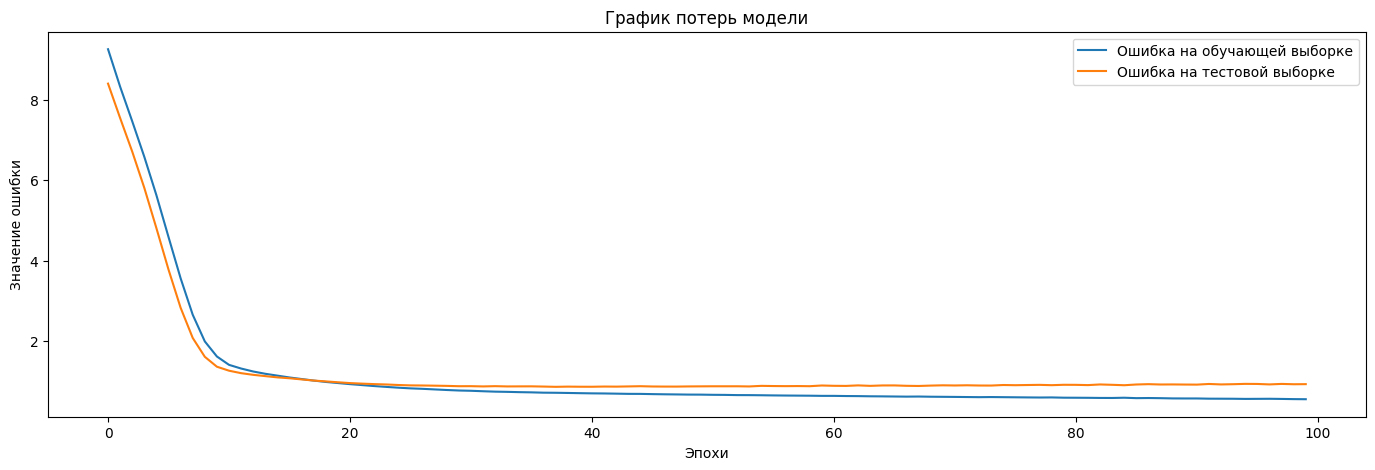

In [15]:
# Строим график потерь модели
plt.figure(figsize=(17, 5))
plt.plot(model_history.history["loss"], label="ошибка на обучающей выборке")
plt.plot(model_history.history["val_loss"], label="ошибка на тестовой выборке")
plt.title("График потерь модели")
plt.ylabel("Значение ошибки")
plt.xlabel("Эпохи")
plt.legend(["Oшибка на обучающей выборке", "Ошибка на тестовой выборке"], loc="best")
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


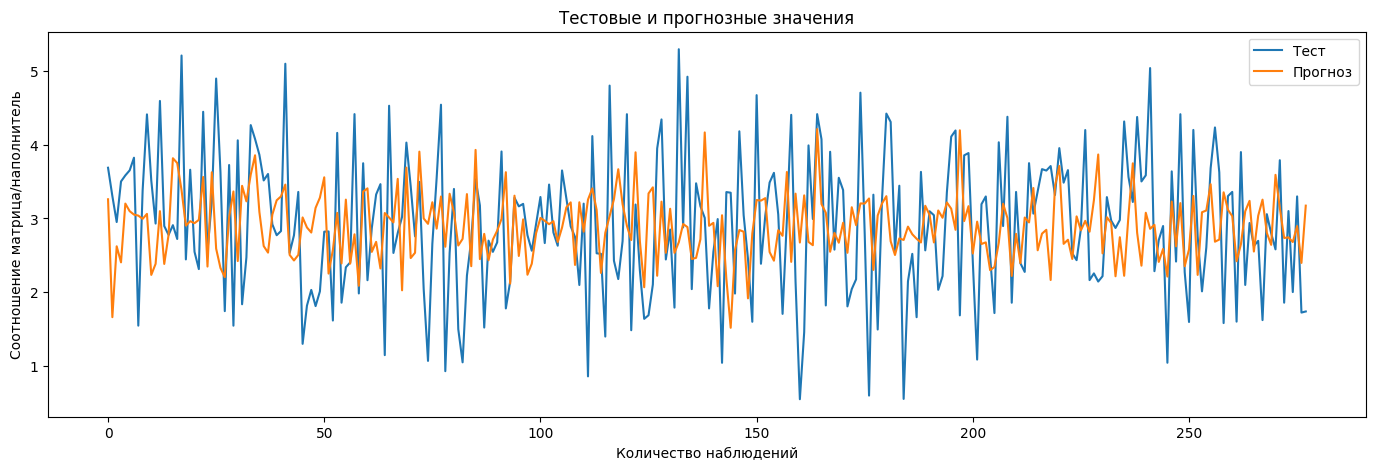

In [16]:
# График расхождения тестовых и прогнозных значений
plt.figure(figsize=(17, 5))
plt.title(f"Тестовые и прогнозные значения")
plt.plot(y_test_smn.values, label="Тест")
plt.plot(model_smn.predict(X_test_smn.values), label="Прогноз")
plt.legend(loc="best")
plt.ylabel('Cоотношение матрица/наполнитель')
plt.xlabel("Количество наблюдений")
plt.show()

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


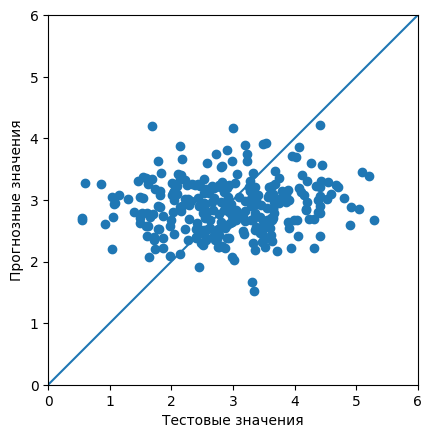

In [17]:
test_predictions = model_smn.predict(X_test_smn).flatten()

a = plt.axes(aspect="equal")
plt.scatter(y_test_smn, test_predictions)
plt.xlabel("Тестовые значения")
plt.ylabel("Прогнозные значения")
lims = [0, 6]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

Сохраняем итоговую модель

In [18]:
with open('model_smn.pkl', 'wb') as file:
    pickle.dump(model_smn, file)


**Вывод**
Метрики нейросети показали следующие результаты:
Корень из среднеквадратичной ошибки: 1.0132991274489693
MSE: 1.0267751216888428
MAE: 0.8330175876617432
R2 -0.1282951831817627
MAPE: 0.3753160536289215

В целом прогнозная способность модели оказалась недостаточно точной. В целом МАЕ позволяет в какой-то мере понимать приблизительный результат соотношения матрицы-наполнителя. Необходимо отметить, что изменения количество слоев нейронов и увеличение количества эпох обучения в целом не дало намного лучшего результата.
Поэтому нужно рассматривать либо иные модели нейронных сетей для решения данной задачи либо обратить внимание на предоставленные данные (с целью уточнения важности критериев, способов их сбора и возможно дополнительной их обработки, создания или вычленения новых признаков).